In [1]:
from villas.dataprocessing.readtools import *
from villas.dataprocessing.timeseries import *
import numpy as np
import matplotlib.pyplot as plt
import re
import dpsimpy

%matplotlib widget

In [2]:
import os
import subprocess

#%matplotlib widget

name = 'EMT_VSI_DroopControl_LoadStep'

dpsim_path = subprocess.Popen(['git', 'rev-parse', '--show-toplevel'], stdout=subprocess.PIPE).communicate()[0].rstrip().decode('utf-8')

path_exec = dpsim_path + '/build/dpsim/examples/cxx/'
sim = subprocess.Popen([path_exec + name], stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
print(sim.communicate()[0].decode())

[21:27:43.011212 PiLine warning] Zero value for Capacitance, setting default value of C=1e-12 [F]
[21:27:43.011229 PiLine warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[21:27:43.015204 EMT_VSI_DroopControl_LoadStep_PF info] Initialize simulation: EMT_VSI_DroopControl_LoadStep_PF
[21:27:43.016910 EMT_VSI_DroopControl_LoadStep_PF_PF_Solver warning] No suitable quantity found for setting mBaseApparentPower. Using 100000000 VA.
[21:27:43.019538 EMT_VSI_DroopControl_LoadStep_PF info] Scheduling tasks.
[21:27:43.021206 EMT_VSI_DroopControl_LoadStep_PF info] Scheduling done.
[21:27:43.021216 EMT_VSI_DroopControl_LoadStep_PF info] Opening interfaces.
[21:27:43.021217 EMT_VSI_DroopControl_LoadStep_PF info] Start synchronization with remotes on interfaces
[21:27:43.021218 EMT_VSI_DroopControl_LoadStep_PF info] Synchronized simulation start with remotes
[21:27:43.021224 EMT_VSI_DroopControl_LoadStep_PF info] Start simulation: EMT_VSI_DroopControl_LoadStep_PF
[21:27:43.

In [3]:
modelName = 'EMT_VSI_DroopControl_LoadStep_EMT'
path = 'logs/' + modelName + '/'
dpsim_result_file = path + modelName + '.csv'
PEAK1PH_TO_RMS3PH = np.sqrt(3.0/2.0)
ts_dpsim = read_timeseries_csv(dpsim_result_file)

column number: 15
results length: 10002
real column names: ['Droop_Phase', 'P_elec', 'Q_elec', 'Spannung_Node_2_0', 'Spannung_Node_2_1', 'Spannung_Node_2_2', 'Spannung_PCC_0', 'Spannung_PCC_1', 'Spannung_PCC_2', 'Spannung_Quelle_0', 'Spannung_Quelle_1', 'Spannung_Quelle_2', 'Strom_RLC_0', 'Strom_RLC_1', 'Strom_RLC_2']
complex column names: []


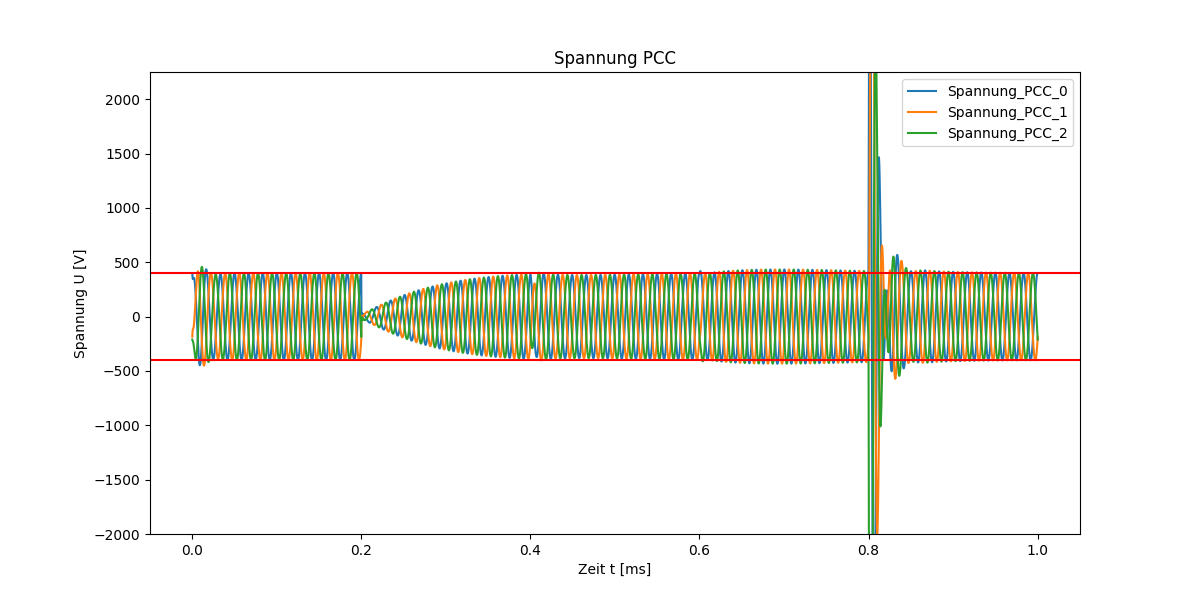

In [4]:
plt.figure(figsize=(12,6))
plt.title('Spannung PCC')
plt.xlabel('Zeit t [ms]')
plt.ylabel('Spannung U [V]')
for ts_name, ts_obj  in ts_dpsim.items():
    if ts_name in ['Spannung_PCC_0', 'Spannung_PCC_1', 'Spannung_PCC_2']:
        plt.plot(ts_obj.time, PEAK1PH_TO_RMS3PH*ts_obj.values, label=ts_name)
plt.axhline(y =400, color = 'r', linestyle = '-')
plt.axhline(y =-400, color = 'r', linestyle = '-')
plt.ylim(-2000,2250)
plt.legend()
plt.show()

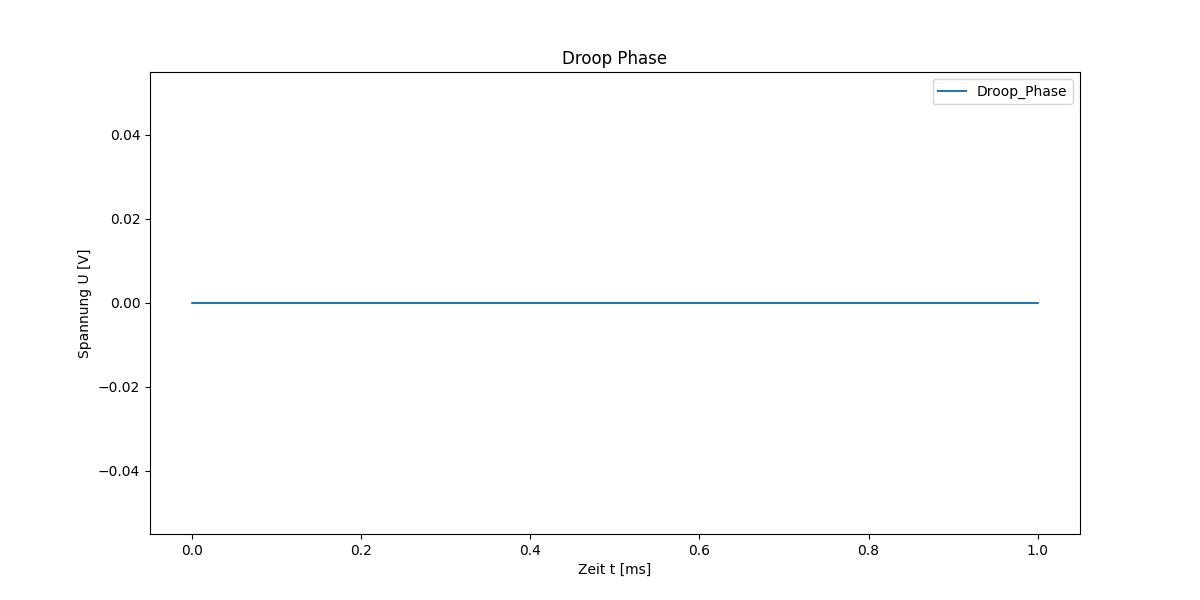

In [5]:
plt.figure(figsize=(12,6))
plt.title('Droop Phase')
plt.xlabel('Zeit t [ms]')
plt.ylabel('Spannung U [V]')
for ts_name, ts_obj  in ts_dpsim.items():
    if ts_name in ['Droop_Phase']:
        plt.plot(ts_obj.time, PEAK1PH_TO_RMS3PH*ts_obj.values, label=ts_name)
plt.legend()
plt.show()